# Установка PySpark

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [637 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,046 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ub

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.5.0-bin-hadoop3.tgz

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/py_container_checks.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning_cleanup.py
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/decom.sh
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/python/
spark-3.5.0-bin-hadoop3/kubern

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# 1. Загрузка данных

Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

**Перечень полей:**

*   state – штат
*   account length – абонентский стаж
*   area code – код региона
*   phone number – номер телефона
*   international plan – тарифный план для международных звонков
*   voice mail plan – тарифный план для голосовой почты
*   number vmail messages – количество сообщений голосовой почты
*   total day minutes – общая длительность звонков в дневное время (мин)
*   total day calls – общее количество звонков в дневное время
*   total day charge – общая стоимость звонков в дневное время
*   total eve minutes – общая длительность звонков в вечернее время (мин)
*   total eve calls – общее количество звонков в вечернее время
*   total eve charge – общая стоимость звонков в вечернее время
*   total night minutes – общая длительность звонков в ночное время (мин)
*   total night calls – общее количество звонков в ночное время
*   total night charge – общая стоимость звонков в ночное время
*   total intl minutes – общая длительность международных звонков (мин)
*   total intl calls – общее количество международных звонков
*   total intl charge – общая стоимость международных звонков
*   number customer service calls – количество звонков в службу поддержки
*   churned – покинул ли клиент компанию

In [52]:
df_churn = spark.read.csv('churn.csv', inferSchema=True, header=True)
df_churn.show(5)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+------------

In [53]:
df_churn.describe().show()

+-------+-----+-----------------+-----------------+------------+------------------+---------------+---------------------+-----------------+----------------+------------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------------------+
|summary|state|   account_length|        area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes| total_day_calls|  total_day_charge| total_eve_minutes|  total_eve_calls|  total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes| total_intl_calls| total_intl_charge|number_customer_service_calls|
+-------+-----+-----------------+-----------------+------------+------------------+---------------+---------------------+-----------------+----------------+------------------+------------------+-----------------+------------------+-------------------

In [54]:
df_pandas = df_churn.toPandas()

# 2. Решение ДЗ

## 2.1. Гистограмма количества звонков в техническую поддержку

array([[<Axes: title={'center': 'number_customer_service_calls'}>]],
      dtype=object)

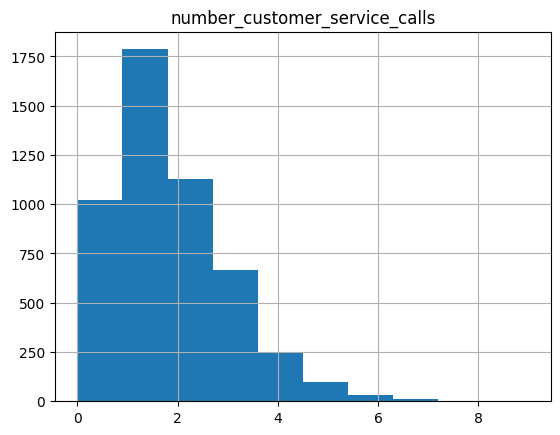

In [55]:
df_pandas.hist(column='number_customer_service_calls')

## 2.2. Гистограмма общей длительности звонков клиента

Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [56]:
df_pandas['total_calls'] = df_pandas['total_day_minutes'] + df_pandas['total_eve_minutes'] + df_pandas['total_night_minutes'] + df_pandas['total_intl_minutes']

array([[<Axes: title={'center': 'total_calls'}>]], dtype=object)

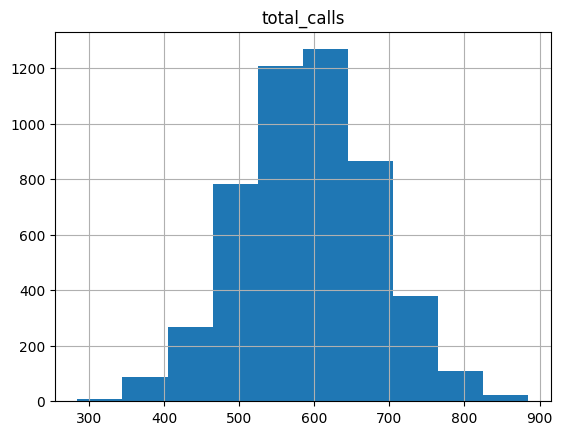

In [57]:
df_pandas.hist(column='total_calls')

## 2.3. Рассчет линейный коэффициент корреляции

Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку

In [58]:
df_pandas['total_minutes'] = df_pandas[['total_day_minutes','total_eve_minutes',
                         'total_night_minutes', 'total_intl_minutes']].sum(axis=1)

total_minutes_mean = df_pandas['total_minutes'].mean()
service_calls_mean = df_pandas['number_customer_service_calls'].mean()

In [59]:
R = sum((df_pandas['total_minutes'] - total_minutes_mean) *
        (df_pandas['number_customer_service_calls'] - service_calls_mean)) / (
            (sum((df_pandas['total_minutes'] - total_minutes_mean) ** 2)) *
            (sum((df_pandas['number_customer_service_calls'] - service_calls_mean) ** 2))
        ) ** (1/2)
R

-0.01140791082744126

In [60]:
df_pandas['total_minutes'].corr(df_pandas['number_customer_service_calls'])

-0.011407910827441392

## 2.4. Точечный график по общему количеству минут / количеству звонков в поддержку

Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

In [61]:
import seaborn as sns

<Axes: xlabel='total_minutes', ylabel='number_customer_service_calls'>

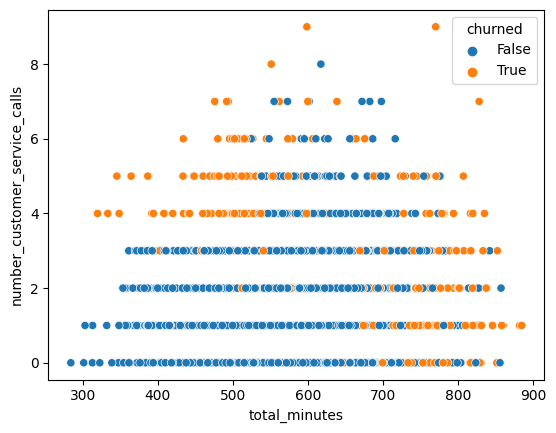

In [62]:
sns.scatterplot(data=df_pandas, x='total_minutes', y='number_customer_service_calls', hue='churned')

## 2.5. Top-5 самых много и самых мало говорящих клиентов

In [63]:
df_pandas.sort_values(by='total_minutes', ascending=False).reset_index()['phone_number'].head(5)

0    345-9140
1    352-6976
2    345-3787
3    410-3888
4    370-4667
Name: phone_number, dtype: object

In [64]:
df_pandas.sort_values(by='total_minutes').reset_index()['phone_number'].head(5)

0    331-3174
1    380-5246
2    362-8044
3    405-9233
4    375-8934
Name: phone_number, dtype: object

## - 2.6. Доля оттока клиентов и средняя стоимость минуты дневного времени разговора в зависимости от штата

In [ ]:
df_pandas['churned'].sum() / df_pandas['phone_number'].count()

0.1414

In [ ]:
def func_div(df):
    df['divs'] = df['total_day_charge'] / float(df['total_day_minutes'].sum())
    return df

In [66]:
df_pandas.groupby('state').apply(func_div)[['state', 'divs']].head(10)

<ipython-input-66-7de591e37d28>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_pandas.groupby('state').apply(func_div)[['state', 'divs']].head(10)


,state,divs
0,KS,0.002373
1,OH,0.001275
2,NJ,0.001923
3,OH,0.002363
4,OK,0.001690
5,AL,0.001617
6,MA,0.001948
7,MO,0.001693
8,LA,0.002203
9,WV,0.001572


## 2.7. Перевод штата в one-hot формат (для pandas)

Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark

In [71]:
import pandas as pd

In [72]:
df_pandas = pd.get_dummies(data=df_pandas, columns=['state'])
df_pandas.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


## 2.8. Разделение данных на train и test

Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df_clear = df_pandas.drop(columns=['phone_number', 'area_code', 'international_plan', 'voice_mail_plan'])

X, y = df_clear.drop(columns=['churned']), df_clear['churned']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2.9. Обучение модели классификации и оценка ее качества

Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [87]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [88]:
model.score(X_test, y_test)

0.87